(correc6)=
# Correction of lab 6

## Sobel and Canny detectors

The objectives of this exercise are to:
* detect edges using Sobel and Canny detectors
* understand the influence of the parameters of these methods
* compare these methods in terms of computation time

In [1]:
from skimage.io import imread
from skimage.filters import sobel, sobel_h, sobel_v
from skimage.feature import canny

from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis

import time

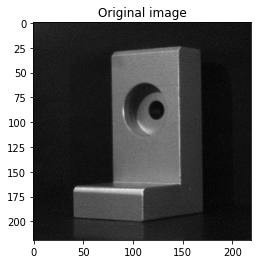

In [2]:
x = imread("L.png")
x = x# / 255
figure
imshow(x, cmap="gray")
title("Original image")
show()

### Sobel detector

The Sobel detector performs a convolution of the image by two filters,
each allowing to obtain the gradient of the image in the two dimensions.
These two gradients can be merged to result in the right image (how are they merged?).

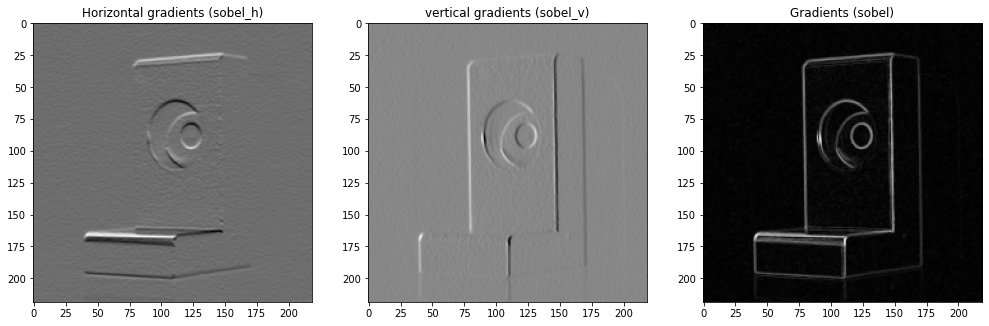

In [3]:
figure(figsize=(17,10))

subplot(1,3,1)
imshow(sobel_h(x), cmap="gray")
title("Horizontal gradients (sobel_h)")

subplot(1,3,2)
imshow(sobel_v(x), cmap="gray")
title("vertical gradients (sobel_v)")

subplot(1,3,3)
imshow(sobel(x), cmap="gray")
title("Gradients (sobel)")

show()

The gradient image can be thresholded to identify major contours.
The results for three threshold values are given below.

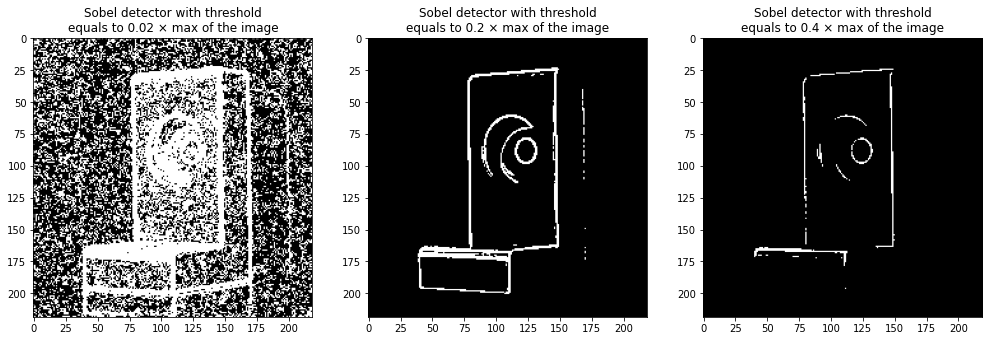

In [4]:
y = sobel(x)
seuils = [.02, .20, .40]

figure(figsize=(17,10))
for i, seuil in enumerate(seuils):
    z = y > seuil*y.max()
    subplot(1,3,i+1)
    imshow(z, cmap="gray")
    title(f"Sobel detector with threshold\nequals to {seuil} × max of the image")

* We note that the higher the threshold, the fewer contours detected (there are fewer white pixels).
  This is because fewer pixels have a gradient greater than the threshold,
  and therefore will be considered as edges.
  
* If the threshold is too low, then edges are detected almost everywhere.
  In particular, the background of the image being (slightly) noisy, edges can be detected there.
  
* On the contrary, if the threshold is too high, then there are a lot of non-detections
  even though there are hardly any false alarms left.
  
* In addition, even by setting the threshold high enough, some edges are still wide:
  they have a width of several pixels, which implies that the edge, although detected, is not positioned with precision.

### Canny detector

Canny detector is more complex than a simple filtering.
It includes in particular a thresholding by hysteresis, _i.e._ a decision based on two thresholds $T_{low}$ and $T_{high}$:
* the pixels of intensity lower than $T_{low}$ will not be considered as edges,
* pixels with an intensity greater than $T_{high}$ will be considered as edges,
* pixels with an intensity between $T_{low}$ and $T_{high}$ will be detected as edges
  if and only if they are neighbors of pixels whic are edges.

**Influence of the Gaussian standard deviation (`sigma`)**

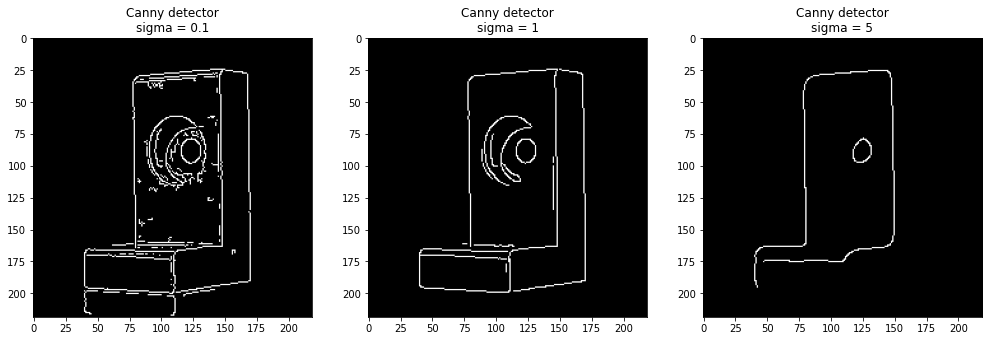

In [5]:
sigs = [0.1, 1, 5]
figure(figsize=(17,10))
for i, sig in enumerate(sigs):
    z = canny(x, sigma=sig)
    subplot(1,3,i+1)
    imshow(z, cmap="gray")
    title(f"Canny detector\nsigma = {sig}")

We observe that if `sigma` increases, then the number of edges detected is lower.
This can be explained by the fact that the first step of the Canny detector is a filtering of the image by a Gaussian
(with standard deviation `sigma`) to reduce the noise.
In consequence, the image is more blurry and therefore the edges are less marked: they are therefore more difficult to detect.

**Influence of $T_{low}$ (`low_threshold`)**

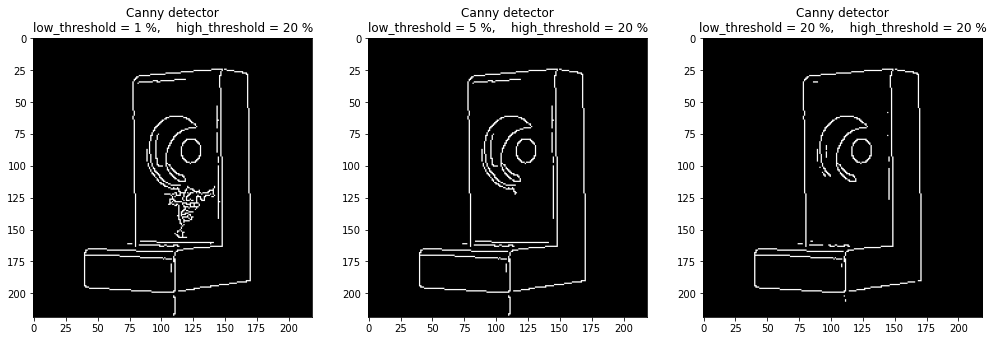

In [6]:
seuils = [0.01, 0.05, 0.2]
seuil_haut = 0.2
figure(figsize=(17,10))
for i, seuil_bas in enumerate(seuils):
    z = canny(x, low_threshold=seuil_bas*x.max(), high_threshold=seuil_haut*x.max())
    subplot(1,3,i+1)
    imshow(z, cmap="gray")
    title(f"Canny detector\nlow_threshold = {seuil_bas*100:.0f} %,    high_threshold = {seuil_haut*100:.0f} %")

When the lower threshold increases, the number of detected edges decreases,
since there are fewer pixels whose gradient value is greater than the lower threshold.

**Influence of $T_{high}$ (`high_threshold`)**

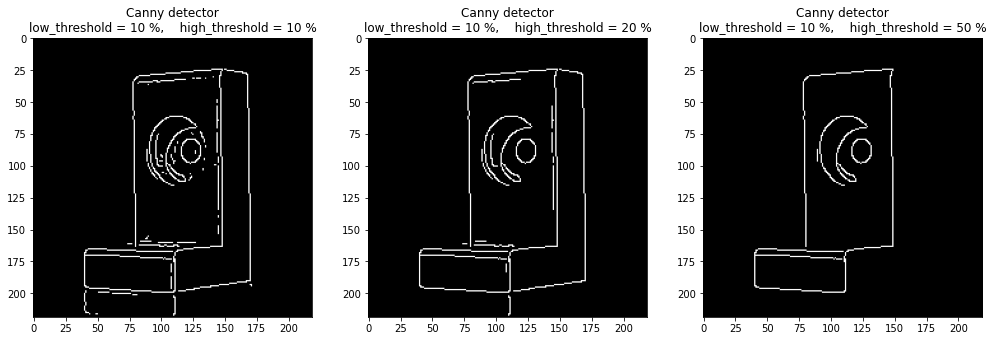

In [7]:
seuils = [0.1, 0.2, 0.5]
seuil_bas = 0.1
figure(figsize=(17,10))
for i, seuil_haut in enumerate(seuils):
    z = canny(x, low_threshold=seuil_bas*x.max(), high_threshold=seuil_haut*x.max())
    subplot(1,3,i+1)
    imshow(z, cmap="gray")
    title(f"Canny detector\nlow_threshold = {seuil_bas*100:.0f} %,    high_threshold = {seuil_haut*100:.0f} %")

As before, the more the higher threshold increases, the fewer edges are detected.

In conclusion, we observe that the number of detected edges decreases with the value of the thresholds, as for the Sobel detector.
Besides, the Canny detector produces fine and mostly continuous contours: detection is therefore clearer and more precise.

### Comparison of the two methods in terms of computation time

One of the steps of the Canny detector is to apply a Sobel filter.
So the Canny detector is expected to be slower than the Sobel detector.
We measure the time required for each method to detect the edges of the image.

For practical reasons, depending especially on the computer used for the test,
the results are not perfectly reproducible:
if you run the comparison twice, the computation times will differ slightly.
Therefore, it is advised to measure the computation times over many simulations (100 below).

In [8]:
I = 100           # Number of simulations
total_sobel = 0   # Total time for the I simulations for the Sobel detector
total_canny = 0   # Total time for the I simulations for the Canny detector

for i in range(I):
    
    # Computation time for the Sobel detector
    tic = time.time()
    y = sobel(x)
    z = y > 0.5*y.max() # Don't forget to take thresholding into account!
    tac = time.time()
    time_sobel = tac-tic
    total_sobel += time_sobel
    
    # Computation time for the Canny detector
    tic = time.time()
    z = canny(x)
    tac = time.time()
    time_canny = tac-tic
    total_canny += time_canny
    
    # Display the computation time of the two methods (for the first 10 simulations only)
    if i<10:
        print(f"Sobel : {time_sobel*1e3:.3f} ms     Canny : {time_canny*1e3:.3f} ms")
    elif i==10:
        print("etc.")
    
print(f"\nCanny detector is, about {total_canny/total_sobel:.0f} times slower than Sobel detector.")

Sobel : 3.114 ms     Canny : 15.084 ms
Sobel : 3.432 ms     Canny : 18.522 ms
Sobel : 4.365 ms     Canny : 19.640 ms
Sobel : 2.470 ms     Canny : 14.086 ms
Sobel : 2.302 ms     Canny : 13.968 ms
Sobel : 2.315 ms     Canny : 14.618 ms
Sobel : 2.404 ms     Canny : 14.072 ms
Sobel : 2.308 ms     Canny : 14.012 ms
Sobel : 2.286 ms     Canny : 13.956 ms
Sobel : 2.285 ms     Canny : 14.046 ms
etc.

Canny detector is, about 6 times slower than Sobel detector.


We were right: Canny detector is slower than Sobel detector.
However, the computation time remains very acceptable for images of classic size (around 15 ms),
so the time difference between the two methods is not detrimental in the majority of applications.

## Harris detector

The objective of this exercise is to detect corners using the Harris detector.

In [9]:
from skimage.io import imread
from skimage.feature import corner_harris, corner_peaks

from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim

In [10]:
x = imread("L.png")
x = x# / 255

The Harris detector can detect corners of an image, based on differences in intensity.

With the function `corner_harris`, choose `method = 'k'` and a value of $k$ between 0 and 0.2.
This results in a new image, of the same size as the original image,
whose intensities are proportional to the presence of a corner.

In the images below, the intensities are restricted to the interval $[-0.4, 0.4]$ in order to highlight the values of the image.

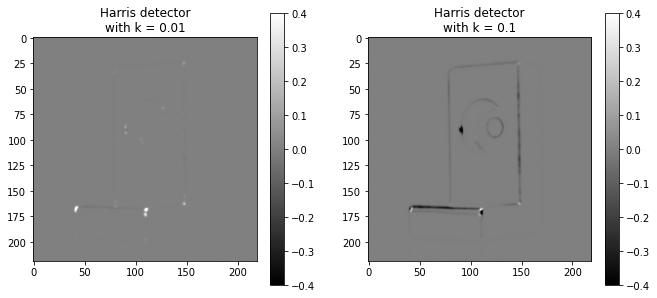

In [11]:
ks = [.01, .10]
figure(figsize=(17,5))
for i, k in enumerate(ks):
    
    y = corner_harris(x, method='k', k=k, sigma=1)
    
    subplot(1,3,i+1)
    imshow(y, cmap="gray")
    clim(-0.4, 0.4)
    colorbar()
    title(f"Harris detector\nwith k = {k}")

The function `corner_peaks` returns the coordinates of the strong values of the image, which correspond to the corners.
These coordinates are returned in the form of a matrix, the first column corresponds to the ordinates, the second to the abscissas.

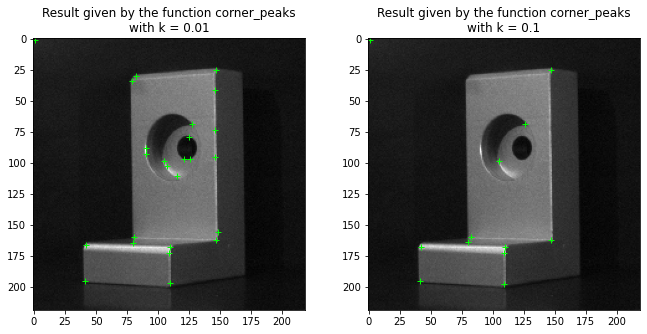

In [12]:
ks = [.01, .10]
figure(figsize=(17,5))
for i, k in enumerate(ks):
    
    y = corner_harris(x, method='k', k=k, sigma=1)
    coords = corner_peaks(y, threshold_rel=.01)
    
    subplot(1,3,i+1)
    imshow(x, cmap="gray")
    plot(coords[:,1], coords[:,0], color='lime', marker='+', linestyle='none')
    title(f"Result given by the function corner_peaks\nwith k = {k}")

The images above correspond to the result obtained for two values of $k$ (and `threshold_rel = 0.01`).
When $k$ is large, only the sharpest corners are detected: one can see this in the image on the right.

However, not all corners of are detected: how to improve the result?

In addition, some points do not correspond to corners.
They correspond actually to pixels with very different intensity from their neighbors,
which is the definition of a corner for Harris.

## Hough transform

The objectives of this exercise are:
* to detect lines in an image with the Hough transform
* to know how to interpret a Hough transform

In [13]:
from math import pi

from numpy import cos, sin, rad2deg

from skimage.io import imread
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, axis

In [14]:
x = imread("L.png")
x = x #/255

The Hough transform is applied to binary images, which must highlight the lines of the image.
Also, an edge detection is needed.
We apply the Canny detector (with the default parameters).

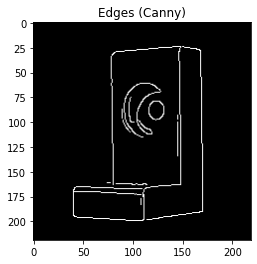

In [15]:
y = canny(x)
figure
imshow(y, cmap="gray")
title("Edges (Canny)")
show()

The function `hough_line` returns the accumulator and the corresponding x-axis and y-axis.

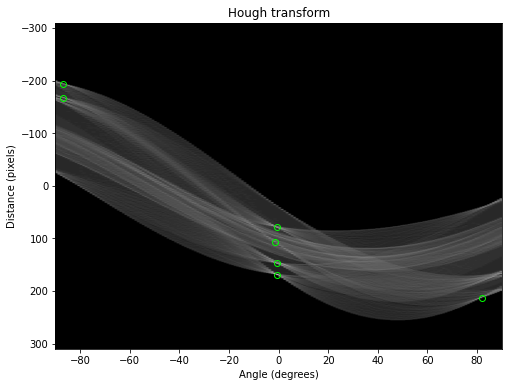

In [16]:
accumulator, angle, dist  = hough_line(y)
peaks, angles, dists = hough_line_peaks(accumulator, angle, dist, threshold=.1*accumulator.max(), num_peaks=7)

axes = (rad2deg(angle[0]), rad2deg(angle[-1]), dist[-1], dist[0])

figure(figsize=(8,6))
imshow(accumulator**.5, cmap="gray", extent=axes, aspect="auto")
xlabel('Angle (degrees)')
ylabel('Distance (pixels)')
title("Hough transform")
plot(rad2deg(angles), dists, marker='o', markeredgecolor='lime', markerfacecolor="none", linestyle="none")
show()

We can see clearly the sinusoids, each corresponding to a white pixel of the image of the contours
(actually, we have done an image transformation to bring out the sinusoids).
When the sinusoids intersect, they increase the intensity of the intersection pixel.
The brightest pixels of the transform correspond to the main lines of the edges.
The function `hough_line_peak` brings these pixels:
the most important are represented by the green circles on the accumulator,
and correspond to the lines shown in the image below.

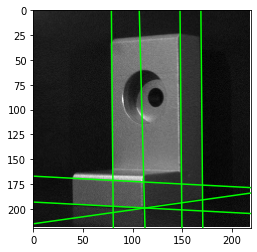

In [17]:
M, N = x.shape

figure
imshow(x, cmap="gray")

for _, angle, dist in zip(peaks, angles, dists):
    
    # Coordonnée de la ligne
    x0 = 0
    y0 = dist / sin(angle)
    x1 = N
    y1 = (dist - x1*cos(angle)) / sin(angle)
    
    # Tracé de la ligne
    plot((x0, x1), (y0, y1), color='lime')

axis((0,N,M,0))
show()

Can you identify where the non-detected lines of the image are on the accumulator?

Try to detect the central circle of the object.